In [1]:
# problem 1

import numpy as np
from PIL import Image


def generate_xfilter():
    _filter = [[-1,0,1],
               [-2,0,2],
               [-1,0,1]]
    _filter = np.array(_filter)
    return _filter

def generate_yfilter():
    _filter = [[1,2,1],
               [0,0,0],
               [-1,-2,-1]]
    _filter = np.array(_filter)
    return _filter

def solution1(image_path):
    original_img = Image.open(image_path)
    original_img = np.array(original_img).astype('float32')
    if len(original_img.shape)==2:
        original_img = np.expand_dims(original_img,2)
    
    
    array_shape = (original_img.shape[0]-2, original_img.shape[1]-2, original_img.shape[2])
    dx_map = np.zeros(shape = array_shape)
    dy_map = np.zeros(shape = array_shape)
    gradient_strength_map = np.zeros(shape = array_shape)
    gradient_orientation_map = np.zeros(shape = array_shape)
    xfilter = generate_xfilter()
    yfilter = generate_yfilter()
    for h in range(original_img.shape[0]-2):
        for w in range(original_img.shape[1]-2):
            for c in range(original_img.shape[2]):
                gradient_x = np.multiply(original_img[h:h+3,w:w+3,c],xfilter).sum()
                gradient_y = np.multiply(original_img[h:h+3,w:w+3,c],yfilter).sum()
                strength = (gradient_x**2 + gradient_y**2)**(1/2)
                orientation = (np.arctan(gradient_y/(gradient_x+1e-8))+np.pi/2)/np.pi*255.
                dx_map[h,w,c]=gradient_x
                dy_map[h,w,c]=gradient_y
                gradient_strength_map[h,w,c] = strength
                gradient_orientation_map[h,w,c] = orientation
        
    threshold1 = 50
    threshold2 = 100
    final_map = gradient_strength_map > (threshold1+threshold2)//2
    return dx_map,dy_map,gradient_strength_map, gradient_orientation_map,final_map

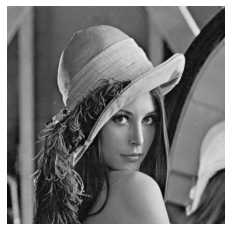

[[[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [ True]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [ True]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [ True]]

 ...

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]

 [[False]
  [False]
  [False]
  ...
  [False]
  [False]
  [False]]]


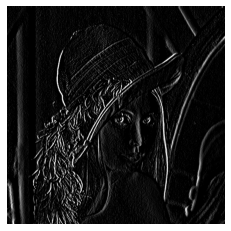

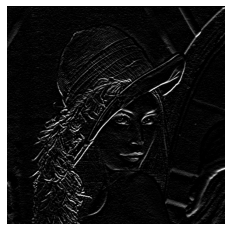

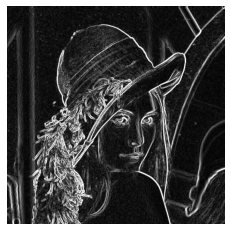

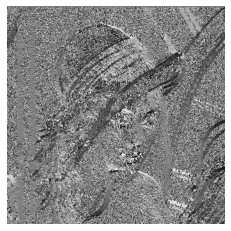

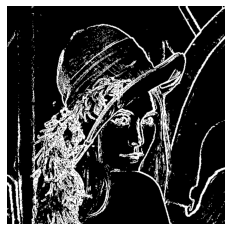

In [3]:
import matplotlib.pyplot as plt

path = 'lena_grey.bmp'
m = Image.open(path)
plt.imshow(m,cmap='gray'), plt.axis('off')
plt.show()
results = solution1(path)
for idx,result in enumerate(results):
    c = np.squeeze(result)
    m = Image.fromarray(c)
    plt.imshow(m, cmap='gray'), plt.axis('off')
    plt.show()

In [4]:
results[0]

array([[[   8.],
        [   0.],
        [ -12.],
        ...,
        [  -4.],
        [ -64.],
        [-168.]],

       [[   8.],
        [   0.],
        [ -12.],
        ...,
        [  -4.],
        [ -64.],
        [-168.]],

       [[   8.],
        [   0.],
        [ -12.],
        ...,
        [  -4.],
        [ -64.],
        [-168.]],

       ...,

       [[   4.],
        [   3.],
        [  16.],
        ...,
        [  16.],
        [   1.],
        [ -21.]],

       [[  21.],
        [  14.],
        [  12.],
        ...,
        [  10.],
        [   3.],
        [ -16.]],

       [[  32.],
        [  20.],
        [   4.],
        ...,
        [  -8.],
        [  15.],
        [   2.]]])

In [45]:
np.radians(180)

3.141592653589793

In [66]:
# problem 1

import numpy as np
from PIL import Image
import cv2

def solution2(image_path):
    original_img = Image.open(image_path)
    original_img = np.array(original_img)
    if len(original_img.shape)==2:
        original_img = np.expand_dims(original_img,2)
        
    threshold1 = 50
    threshold2 = 100
    img_canny = cv2.Canny(original_img, threshold1, threshold2, 
                          edges=None, apertureSize=None, L2gradient=None)
    return img_canny

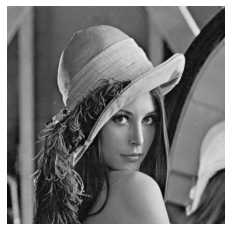

(512, 512)


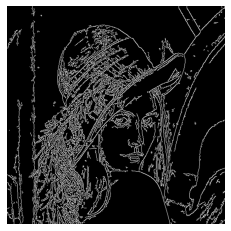

In [67]:
import matplotlib.pyplot as plt

path = 'lena_grey.bmp'
m = Image.open(path)
plt.imshow(m,cmap='gray'), plt.axis('off')
plt.show()
result = solution2(path)

c = np.squeeze(result)
print(c.shape)
m = Image.fromarray(c)
plt.imshow(m, cmap='gray'), plt.axis('off')
plt.show()

In [5]:
import numpy as np
from PIL import Image

def solution3(image_path,k):
    
    original_img = Image.open(image_path)
    original_img = np.array(original_img).astype('float32')
    if len(original_img.shape)==2:
        original_img = np.expand_dims(original_img,2)
    
    def bilinear_scalingup(x,p1,p2,p3,p4):
        fx1 = ((x[1]-p1[1])/(p2[1]-p1[1]))*result_img[p1[0],p1[1]] + ((-x[1]+p2[1])/(p2[1]-p1[1]))*result_img[p2[0],p2[1]]
        fx2 = ((x[1]-p3[1])/(p4[1]-p3[1]))*result_img[p3[0],p3[1]] + ((-x[1]+p4[1])/(p4[1]-p3[1]))*result_img[p4[0],p4[1]]
        return ((x[0]-p1[0])/(p3[0]-p1[0]))*fx1 + ((-x[0]+p3[0])/(p3[0]-p1[0]))*fx2
    
    
    result_img = np.zeros(shape = (k*original_img.shape[0],k*original_img.shape[1], original_img.shape[2]))
    for c in range(original_img.shape[2]):
        result_img[0,0,c]=original_img[0,0,c]
        result_img[0,1,c]=original_img[0,1,c]
        result_img[1,0,c]=original_img[1,0,c]
    for h in range(0,original_img.shape[0]-1):
        for w in range(0,original_img.shape[1]-1):
            for c in range(original_img.shape[2]):
                # 일단 4개의 포인트를 잡아서 값을 넣는다
                result_img[k*h-1,k*w-1,c] = original_img[h-1,w-1,c]
                result_img[k*h-1,k*w,c] = original_img[h-1,w,c]
                result_img[k*h,k*w-1,c] = original_img[h,w-1,c]
                result_img[k*h,k*w,c] = original_img[h,w,c]
                for i in range(k):
                    for j in range(k):
                        # 안의 값들 채워넣기
                        if (i==0 and j==0) or (i==k-1 and j==0) or (i==0 and j==k-1) or (i==k-1 and j==k-1):
                            continue
                        x = (h+i,w+j)
                        p1 = (h,w)
                        p2 = (h,w+k)
                        p3 = (h+k,w)
                        p4 = (h+k,w+k)
                        result_img[h+i,w+i,c] = bilinear_scalingup(x,p1,p2,p3,p4)
    return result_img

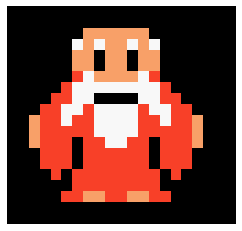

(20, 21, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


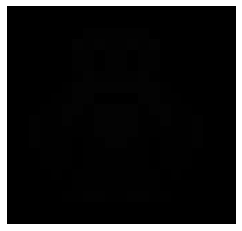

In [6]:
import matplotlib.pyplot as plt

#path = 'lena_grey.bmp'
path = 'temp.png'
m = Image.open(path)
plt.imshow(m,cmap='gray'), plt.axis('off')
plt.show()
result = solution3(path,2)

c = np.squeeze(result)
print(c)
m = Image.fromarray(c)
plt.imshow(m, cmap='gray'), plt.axis('off')
plt.show()

In [8]:
# problem 4




def solution4(image_path, matrix):
    
    original_img = Image.open(image_path)
    original_img = np.array(original_img)
    if len(original_img.shape)==2:
        original_img = np.expand_dims(original_img,2)
        

    original_height = original_img.shape[0]
    original_width = original_img.shape[1]
    original_channel = original_img.shape[2]
    
    
    transform_img = np.zeros(shape = (original_height, original_width, original_channel))
    
    
    
    for i in range(original_height):
        for j in range(original_width):
            x,y,w = matrix.dot(np.array([j,i,1]))
            
                
            x = int(np.around(x/w))
            y = int(np.around(y/w))
            
            transform_img[y,x,:]=original_img[i,j,:]
            
    for i in range(original_height):
        for j in range(original_width):
            if transform_img[i,j].all()==0:
                x,y,w = np.linalg.inv(matrix).dot(np.array([j,i,1]))
                x=int(np.around(x/w))
                y=int(np.around(y/w))
                if 0<=x<original_width and 0<=y<original_height:
                    transform_img[i,j,:]=original_img[y,x,:]
    
    return transform_img

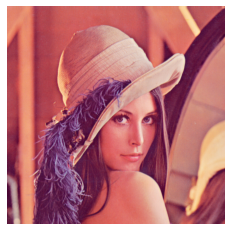

(512, 512, 3)


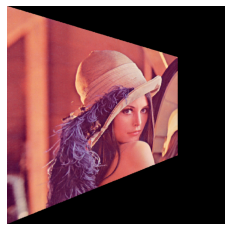

In [15]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

path = 'lena.bmp'
m = Image.open(path)
plt.imshow(m,cmap='gray'), plt.axis('off')
plt.show()


matrix = np.array([[1.73913043, 0.        , 0.        ],
       [0.52173913, 1.        , 0.        ],
       [0.0023947 , 0.        , 1.        ]])


result = solution4(path,matrix)

c = np.squeeze(result).astype('uint8')
print(c.shape)
m = Image.fromarray(c)

plt.imshow(m, cmap='gray'), plt.axis('off')
plt.show()

In [14]:
import cv2
src = np.float32([[0,0],[512,0],[512,512],[0,512]])
dst = np.float32([[0,0],[400,120],[400,350],[0,512]])
cv2.getPerspectiveTransform(src,dst)

array([[1.73913043, 0.        , 0.        ],
       [0.52173913, 1.        , 0.        ],
       [0.0023947 , 0.        , 1.        ]])

In [109]:
import cv2

path = 'lena.bmp'

m = Image.open(path)
m = np.array(m)
matrix = np.array([[4,0,0],[0.5,1,0],[0.0.8,0,1]])
matrix.dot([511,511,1])
#dst = cv2.warpPerspective(src=m, M=matrix, dsize=(512,512))
#plt.imshow(dst)

SyntaxError: invalid syntax (<ipython-input-109-332909ef837b>, line 7)

In [123]:
src = np.float32([[0,0],[512,0],[512,512],[0,512]])
dst = np.float32([[0,0],[400,50],[400,250],[0,512]])
cv2.getPerspectiveTransform(src,dst)

array([[2.        , 0.        , 0.        ],
       [0.25      , 1.        , 0.        ],
       [0.00304688, 0.        , 1.        ]])

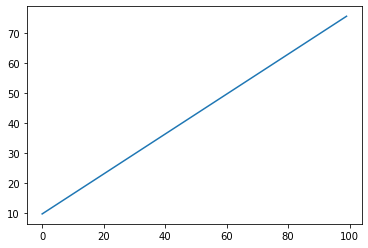

In [262]:
plt.plot(x.tolist(),y.tolist())

In [1]:
import cv2
import numpy as np

def backward_transform(img, angle):
    height, width = img.shape
    result = np.zeros((height, width), np.uint8)

    #affine = np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0],
    #                  [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
    #                  [0, 0, 1]])
    affine = np.array([[3,0,0],[1,1,0],[0.15,0,1]])
    for x in range(width):
        for y in range(height):
            p = affine.dot(np.array([x, y, 1]))
            xp = int(p[0])
            yp = int(p[1])

            if 0 <= yp < height and 0 <= xp < width:
                result[y, x] = img[yp, xp]
    return result

in_image = cv2.imread('lena_grey.bmp', 0)
out_image = backward_transform(in_image, 20)

cv2.imshow('input', in_image)
cv2.imshow('output', out_image)

cv2.imwrite('bw_transformed.jpg', out_image)
cv2.waitKey()

100

In [ ]:
import cv2
import numpy as np

def backward_transform(img, angle):
    height, width = img.shape
    result = np.zeros((height, width), np.uint8)

    #affine = np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0],
    #                  [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
    #                  [0, 0, 1]])
    affine = np.array([[3,0,0],[1,1,0],[0.15,0,1]])
    for x in range(width):
        for y in range(height):
            p = affine.dot(np.array([x, y, 1]))
            xp = int(p[0])
            yp = int(p[1])

            if 0 <= yp < height and 0 <= xp < width:
                result[y, x] = img[yp, xp]
    return result

in_image = cv2.imread('lena_grey.bmp', 0)
out_image = backward_transform(in_image, 20)

cv2.imshow('input', in_image)
cv2.imshow('output', out_image)

cv2.imwrite('bw_transformed.jpg', out_image)
cv2.waitKey()